## Training

## Inference

In [1]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 用 CPU
import numpy as np
from umap.parametric_umap import load_ParametricUMAP   # ← 官方加载 API
# 若此前使用 `from parametric_umap import ParametricUMAP` 保存，
# 这里依旧使用同一个包路径 (两者等价)

# ───────── 1. 路径 ─────────
model_dir = '/data/hanzhe/20250424cs/umap_parametric/model'  # 包含 encoder.keras 等文件
x_path    = '/data/hanzhe/20250424cs/ICE_data/ICE_vMFNM/X_ICE_vMFNM.npy'
save_path = '/data/hanzhe/20250424cs/ICE_vMFNM/umap_parametric/ICE_vMFNM_umap_paremetric_inference.npy'

# ───────── 2. 载入模型与数据 ─────────
embedder   = load_ParametricUMAP(model_dir)
X_trimmed  = np.load(x_path)



# ───────── 3. 推断 / 降维 ─────────
embedding  = embedder.transform(X_trimmed)   # shape: (n_samples, n_components)
print("嵌入矩阵形状 :", embedding.shape)

# ───────── 4. 保存结果 ─────────
os.makedirs(os.path.dirname(save_path), exist_ok=True)
np.save(save_path, embedding)
print("✅ 已保存至:", save_path)


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-25 11:17:20.078625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745579840.092403 2037752 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745579840.096578 2037752 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745579840.108759 2037752 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once

Fri Apr 25 11:17:24 2025 Building and compiling search function
Pickle of ParametricUMAP model loaded from /data/hanzhe/20250424cs/umap_parametric/model/model.pkl
Keras encoder model loaded from /data/hanzhe/20250424cs/umap_parametric/model/encoder.keras
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

2025-04-25 11:17:26.490299: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-25 11:17:26.490342: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-04-25 11:17:26.490348: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-04-25 11:17:26.490362: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-25 11:17:26.490368: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: cez147
2025-04-25 11:17:26.490372: I external/local_xla/xla/stream_executor/cuda/cuda_d

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
嵌入矩阵形状 : (2000, 2)
✅ 已保存至: /data/hanzhe/20250424cs/ICE_vMFNM/umap_parametric/ICE_vMFNM_umap_paremetric_inference.npy


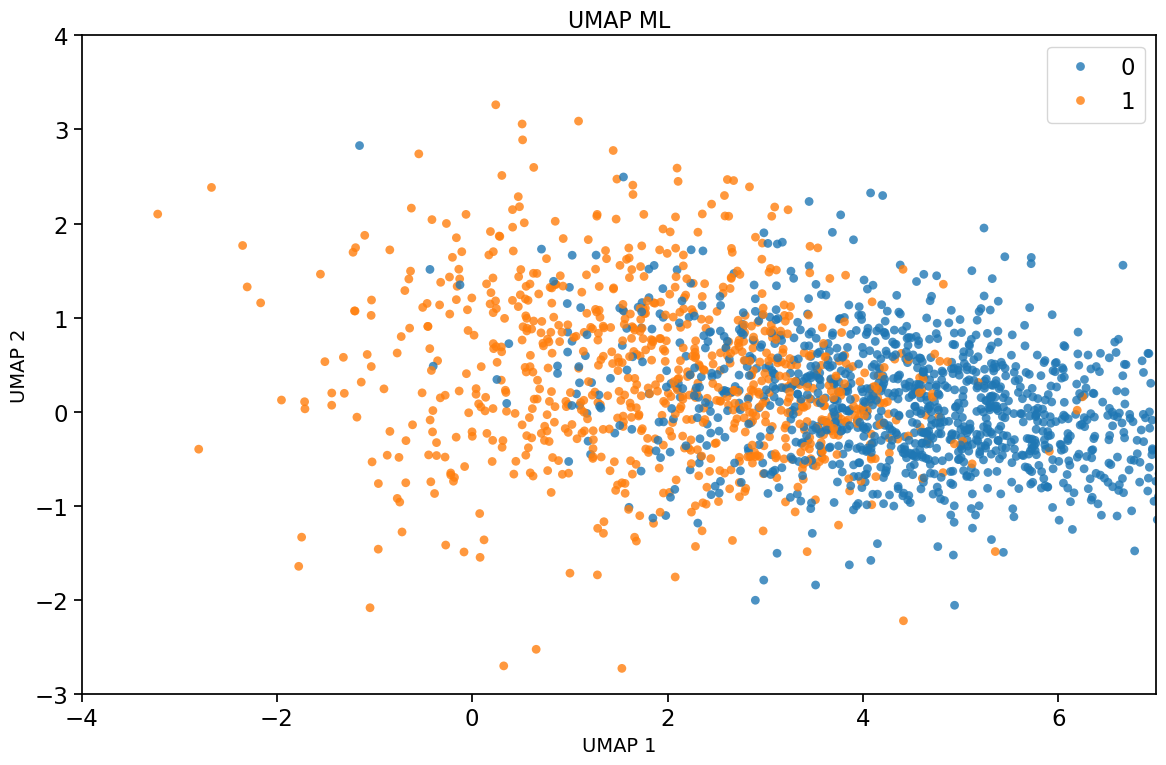

In [2]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/ICE_vMFNM/umap_parametric/ICE_vMFNM_umap_paremetric_inference.npy'
y_path     = '/data/hanzhe/20250424cs/ICE_data/ICE_vMFNM/y_ICE_vMFNM.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP ML", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)
x_min, x_max = -4, 7
y_min, y_max = -3, 4

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()


plt.show()

